# Geometric Foundations of Data Analysis Assignment - James Spillane

## 1.1

### Importing Data

In [1]:
#import x data
xs = []
with open('CS4102_Assignment(1)-Xs.txt') as f:
    for line in f:
        xs.append(float(line.strip().replace(',','=').split('=')[1]))

In [2]:
#import y data
ys = []
with open('CS4102_Assignment(1)-Xs.txt') as f:
    for line in f:
        ys.append(float(line.strip().replace(',','=').split('=')[3]))

### Question 1

Let's firstly ensure the data is in the right format. In this case we must convert it to a matrix which can be done using numpy.

In [55]:
import numpy as np

x_squared = [x**2 for x in xs]
X = np.array([(1,x) for x in xs])
X = np.insert(X, 2, x_squared, axis=1)

According to the notes, we can compute the column vector B using the formula: $$ B = (X^t X)^{-1} X^t Y $$

We must first prepare the matrices $X^t X$ and $X^t Y$ using numpys '@' operator for matrix multiplication and numpys 'T' method for the matrix transpose. Finally, we can use np.linalg.inv to invert the matrix and compute B.

In [4]:
XtX = X.T @ X
XtY = X.T @ ys
B = np.linalg.inv(XtX) @ XtY
B

array([12.34270521,  5.00610241, -0.10068145])

The least squares model is described as: $$ \hat{y} = 12.343 + 5.006x -0.101x^{2} $$

### Question 2

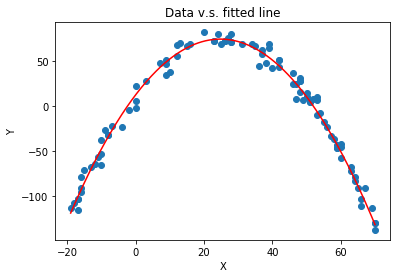

In [6]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

x_s = np.array(np.linspace(min(xs), max(xs), 500))
yhat = [12.343+5.006*x-0.101*(x**2) for x in x_s]

X_Y_Spline = make_interp_spline(x_s,yhat)

Y_graph = X_Y_Spline(x_s)

plt.plot(xs,ys, 'o')
plt.plot(x_s,Y_graph,color='Red')
plt.title("Data v.s. fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Question 3

$ R^{2} $ is given in the notes by the formula: $$ 1- \frac{SSE}{SSTO} $$ and SSE and SSTO were described as follows: $$ SSE = \sum{(y_{i} - \hat{y_{i}}})^{2}, SSTO = \sum{(y_{i}-\bar{y}})^{2}$$

In [7]:
yhat = [12.343+5.006*x-0.101*(x**2) for x in xs]
SSE = sum([s**2 for s in np.array(ys) - np.array(yhat)])
SSTO = sum([x**2 for x in np.array(ys) - np.mean(ys)])

rsquared = 1-(SSE/SSTO)
print('rsquared:',rsquared)

rsquared: 0.9855162870177645


## 1.2

### Question 1(a)

In [8]:
#Load the data
xxx1 = [7, 18, 5, 14, 11, 5, 23, 9, 16, 5]
xxx2 = [5.11, 16.70, 3.20, 7.00, 11.00, 4.00, 22.10, 7.00, 10.60, 4.80]
yyy = np.array([58, 152, 41, 93, 101, 38, 203, 78, 117, 44])

#putting data into matrix form
X_2 = np.array([(1,xxx1[i], xxx2[i]) for i in range(10)])

In [9]:
X_2

array([[ 1.  ,  7.  ,  5.11],
       [ 1.  , 18.  , 16.7 ],
       [ 1.  ,  5.  ,  3.2 ],
       [ 1.  , 14.  ,  7.  ],
       [ 1.  , 11.  , 11.  ],
       [ 1.  ,  5.  ,  4.  ],
       [ 1.  , 23.  , 22.1 ],
       [ 1.  ,  9.  ,  7.  ],
       [ 1.  , 16.  , 10.6 ],
       [ 1.  ,  5.  ,  4.8 ]])

Doing the same as we did for earlier question to find B.

In [11]:
XtX = X_2.T @ X_2
XtY = X_2.T @ yyy
B = np.linalg.inv(XtX) @ XtY
B

array([3.36508318, 4.06510383, 4.72071287])

The least squares model is described as: $$ \hat{y} = 3.365 + 4.065x_{1} +4.721x_{2} $$

### Question 1(b)

For the significant level $ \alpha $, we:
<br> -Reject $ H_{0} $ if $ F^{*} $ > $ F(1-\alpha,p-1,n-p) $
<br> -Cannot reject $ H_{0} $ if $ F^{*}$ $\leq $ $ F(1-\alpha,p-1,n-p) $ 

$$ H_{0}: \beta_{1} = 0 $$ $$ H_{1}: \beta_{1} \neq0 $$

 Next, the F-test requires slightly modified quantities:
$$ \mathrm{MSR} = \frac{\mathrm{SSR}}{p-1},\qquad, \mathrm{MSE} = \frac{SSE}{n-p},\qquad, F^{*} = \frac{\mathrm{MSR}}{\mathrm{MSE}} $$
<br> Let's firstly calculate SSR and SSE. These can also be defined in matrix form as:



$$
    \mathrm{SSR} = B^t X^t Y - n \bar{y}^2,\qquad
    \mathrm{SSE} = Y^t Y - B^t X^t Y, \qquad,
    \mathrm{SSTO} = Y^t Y - n \bar{y}^2,
    $$

In [13]:
Yhat = X_2 @ B
ybar = sum(yyy)/len(yyy)
BtXtY = B.T @ XtY
YtY = yyy.T @ yyy
nybar2 = len(yyy) * ybar**2

In [14]:
SSR = BtXtY - nybar2
SSE = (YtY - BtXtY)
SSTO = SSR + SSE
print(SSR, SSE, SSTO)

25720.110120239115 78.38987976088538 25798.5


In [15]:
n = len(X_2)
p = len(X_2[0])
MSR = SSR/(p-1)
MSE = SSE/(n-p)
Fstar = MSR/MSE
Fstar

1148.3674384426708

Assuming that errors are independent: 

In [16]:
from scipy.stats import f
alpha = 0.05
f.pdf(1-alpha, p-1, n-p)

0.3393799256299524

In [17]:
Fstar > f.pdf(1-alpha, p-1, n-p)

True

As $F^{*}$ is greater than the given f value. We can reject $ H_{0} $ at significance level $ \alpha $

## Question 1(c)

Theory says that if $q$ of the $\beta_k$ are jointly estimated, the confidence intervals, with coefficient 1 - $\alpha$ are,
    $$
    b_k - T \cdot s(b_k) \leq \beta_k \leq b_k + T \cdot s(b_k),
    $$\
    "where $T = t(1 - \frac{\alpha}{2q}, n - p)$.
     The value of the $T$-distribution can be found in a table, online or off-line, or again with the help of the `scipy.stats` package."

In [34]:
S2B = MSE * np.linalg.inv(XtX)
S2B

array([[ 5.48786556, -0.62261872,  0.2915071 ],
       [-0.62261872,  0.24498625, -0.23447993],
       [ 0.2915071 , -0.23447993,  0.25768945]])

In [48]:
from scipy.stats import t
q=2
T = t.pdf(1-alpha/2/q, n-p)
T

0.22850012578377452

So, when estimating $\beta_1$ and $\beta_2$ jointly, after extracting the values $s(b_k)$ as square roots of the diagonal values of the array `S2B`, we can find the *lower and upper bound* of the confidence intervals for the $\beta_k$ as follows

In [44]:
SB = np.diagonal(S2B)**0.5
print('(',B[1] - T*SB[1],',', B[1] + T*SB[1],')')

( 3.9520052171434608 , 4.178202451731499 )


In [45]:
print('(',B[2] - T*SB[2],',', B[2] + T*SB[2],')')

( 4.604719075570606 , 4.836706667666967 )


With 95% confidence the true value of $ \beta_{1} $ lies between 3.95 and 4.18 and the true value of $ \beta_{2}$ lies between 4.60 and 4.84

## Question 1(d)

For any new individual with $X_{new} = (x_{1},....,x_{p})^{T}$, the predict mean response is: $$\hat{Y_{new}} = X^{T}B$$ 
<br>With confidence 100(1-$\alpha$)% the C.I. for E($Y_{new}$) is: $$[\hat{Y_{new}}  - s(\hat{Y_{new}})*t(1-\alpha/2,n-p-1),  \hat{Y_{new}}  + s(\hat{Y_{new}})*t(1-\alpha/2,n-p-1) ] $$ where, $$ S^{2}(Y_{new}) = X^{T}(X^{T}X)^{-1}X*MSE $$

In [35]:
x1 = [5,6,10,14,20]
x2 = [3.2, 4.8, 7, 10, 18]
X = np.array([(1,x1[i], x2[i]) for i in range(5)])

In [45]:
Yhatnew =  X @ B
s2new = np.diagonal((X @ np.linalg.inv(XtX) @ X.T * MSE))
s2new

array([ 4.99597547,  6.0762851 ,  3.50124277,  8.12451845, 10.89764096])

In [53]:
for i in range(5):
    print('(',Yhatnew[i] - math.sqrt(s2new[i])*t.pdf(1-.1/2, 5-3-1), Yhatnew[i] + math.sqrt(s2new[i])*t.pdf(1-.1/2, 5-3-1),')')

( 38.42291453746403 39.170852550616324 )
( 50.00270340009332 50.82755254604211 )
( 76.74804514528203 77.3741781114759 )
( 107.0067689258094 107.9605622361611 )
( 169.08767036540067 170.19231275572017 )


## Question 2

To check whether or not normal error terms are appropriate we should plot them against the actual error $\hat{y}_{i}$, ahainst the input data $x_{i1}$, and against the input data $x_{i2}$

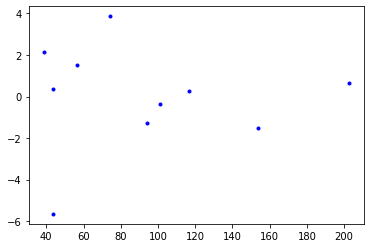

In [57]:
import matplotlib.pyplot as plt
Yhat = X_2 @ B
E = yyy - Yhat
plt.plot(Yhat, E, 'b.')

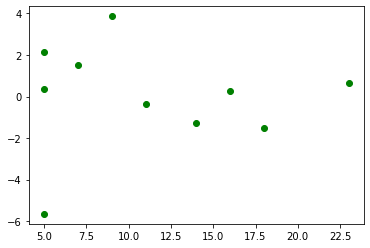

In [60]:
plt.plot(X_2[:,1], E, 'go')

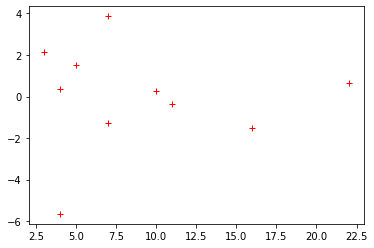

In [61]:
plt.plot(X_2[:,2], E, 'r+')

As we can see none of these plots follow a linear relationship and therefore we cannot assume that the error terms are normally distributed.